In [5]:
%matplotlib inline

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.cluster import KMeans

Load Data

In [7]:
obesity_data = pd.read_csv("ObesityDataSet Cleaned and Data Sinthetic.csv")

In [8]:
obesity_data.tail()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
2106,"2,107",female,21,1.71,131,yes,yes,always,3,sometimes,no,between 1 and 2 l,no,2 to 4,3 to 5,sometimes,public_transportation,obesity_type_iii,44.901475
2107,"2,108",female,22,1.75,134,yes,yes,always,3,sometimes,no,between 1 and 2 l,no,1 to 2,3 to 5,sometimes,public_transportation,obesity_type_iii,43.741923
2108,"2,109",female,23,1.75,134,yes,yes,always,3,sometimes,no,between 1 and 2 l,no,1 to 2,3 to 5,sometimes,public_transportation,obesity_type_iii,43.543817
2109,"2,110",female,24,1.74,133,yes,yes,always,3,sometimes,no,more than 2 l,no,1 to 2,3 to 5,sometimes,public_transportation,obesity_type_iii,44.071535
2110,"2,111",female,24,1.74,133,yes,yes,always,3,sometimes,no,more than 2 l,no,1 to 2,3 to 5,sometimes,public_transportation,obesity_type_iii,44.144338


In [9]:
obesity_data

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,1,female,21,1.62,64,yes,no,sometimes,3,sometimes,no,between 1 and 2 l,no,0,3 to 5,no,public_transportation,normal_weight,24.386526
1,2,female,21,1.52,56,yes,no,always,3,sometimes,yes,more than 2 l,yes,4 to 5,0 to 2,sometimes,public_transportation,normal_weight,24.238227
2,3,male,23,1.80,77,yes,no,sometimes,3,sometimes,no,between 1 and 2 l,no,2 to 4,3 to 5,frequently,public_transportation,normal_weight,23.765432
3,4,male,27,1.80,87,no,no,always,3,sometimes,no,between 1 and 2 l,no,2 to 4,0 to 2,frequently,walking,overweight_level_i,26.851852
4,5,male,22,1.78,90,no,no,sometimes,1,sometimes,no,between 1 and 2 l,no,0,0 to 2,sometimes,public_transportation,overweight_level_ii,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,"2,107",female,21,1.71,131,yes,yes,always,3,sometimes,no,between 1 and 2 l,no,2 to 4,3 to 5,sometimes,public_transportation,obesity_type_iii,44.901475
2107,"2,108",female,22,1.75,134,yes,yes,always,3,sometimes,no,between 1 and 2 l,no,1 to 2,3 to 5,sometimes,public_transportation,obesity_type_iii,43.741923
2108,"2,109",female,23,1.75,134,yes,yes,always,3,sometimes,no,between 1 and 2 l,no,1 to 2,3 to 5,sometimes,public_transportation,obesity_type_iii,43.543817
2109,"2,110",female,24,1.74,133,yes,yes,always,3,sometimes,no,more than 2 l,no,1 to 2,3 to 5,sometimes,public_transportation,obesity_type_iii,44.071535


In [10]:
obesity_data.shape

(2111, 19)

Dataset has 2111 rows and 17 columns

In [11]:
obesity_data.dtypes

id                                 object
Gender                             object
Age                                 int64
Height                            float64
Weight                              int64
family_history_with_overweight     object
FAVC                               object
FCVC                               object
NCP                                 int64
CAEC                               object
SMOKE                              object
CH2O                               object
SCC                                object
FAF                                object
TUE                                object
CALC                               object
MTRANS                             object
NObeyesdad                         object
BMI                               float64
dtype: object

In [12]:
obesity_data.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
BMI                               0
dtype: int64

# **Exploratory Data Analysis**

In [13]:
obesity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2111 non-null   object 
 1   Gender                          2111 non-null   object 
 2   Age                             2111 non-null   int64  
 3   Height                          2111 non-null   float64
 4   Weight                          2111 non-null   int64  
 5   family_history_with_overweight  2111 non-null   object 
 6   FAVC                            2111 non-null   object 
 7   FCVC                            2111 non-null   object 
 8   NCP                             2111 non-null   int64  
 9   CAEC                            2111 non-null   object 
 10  SMOKE                           2111 non-null   object 
 11  CH2O                            2111 non-null   object 
 12  SCC                             21

In [14]:
obesity_data.describe()

,Age,Height,Weight,NCP,BMI
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701715,86.588820,2.687826,29.700159
std,6.357078,0.093569,26.188572,0.809680,8.011337
min,14.000000,1.450000,39.000000,1.000000,12.998685
25%,20.000000,1.630000,65.500000,3.000000,24.325802
50%,23.000000,1.700000,83.000000,3.000000,28.719089
75%,26.000000,1.770000,107.000000,3.000000,36.016501
max,61.000000,2.000000,173.000000,4.000000,50.811753


In [15]:
obesity_data['NObeyesdad'].describe()

count               2111
unique                 7
top       obesity_type_i
freq                 351
Name: NObeyesdad, dtype: object

In [16]:
# Melihat jumlah nilai unik untuk setiap fitur kategorikal
for column in obesity_data.select_dtypes(include=['object']).columns:
    print(column + ":")
    print(obesity_data[column].value_counts())
    print()

id:
id
1        1
1,419    1
1,417    1
1,416    1
1,415    1
        ..
699      1
698      1
697      1
696      1
2,111    1
Name: count, Length: 2111, dtype: int64

Gender:
Gender
male      1068
female    1043
Name: count, dtype: int64

family_history_with_overweight:
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

FAVC:
FAVC
yes    1866
no      245
Name: count, dtype: int64

FCVC:
FCVC
sometimes    1013
always        996
never         102
Name: count, dtype: int64

CAEC:
CAEC
sometimes     1765
frequently     242
always          53
no              51
Name: count, dtype: int64

SMOKE:
SMOKE
no     2067
yes      44
Name: count, dtype: int64

CH2O:
CH2O
between 1 and 2 l    1110
more than 2 l         516
less than a liter     485
Name: count, dtype: int64

SCC:
SCC
no     2015
yes      96
Name: count, dtype: int64

FAF:
FAF
1 to 2    776
0         720
2 to 4    496
4 to 5    119
Name: count, dtype: int64

TUE:
TUE
0 to 2    952
3 to 5    915
>5      

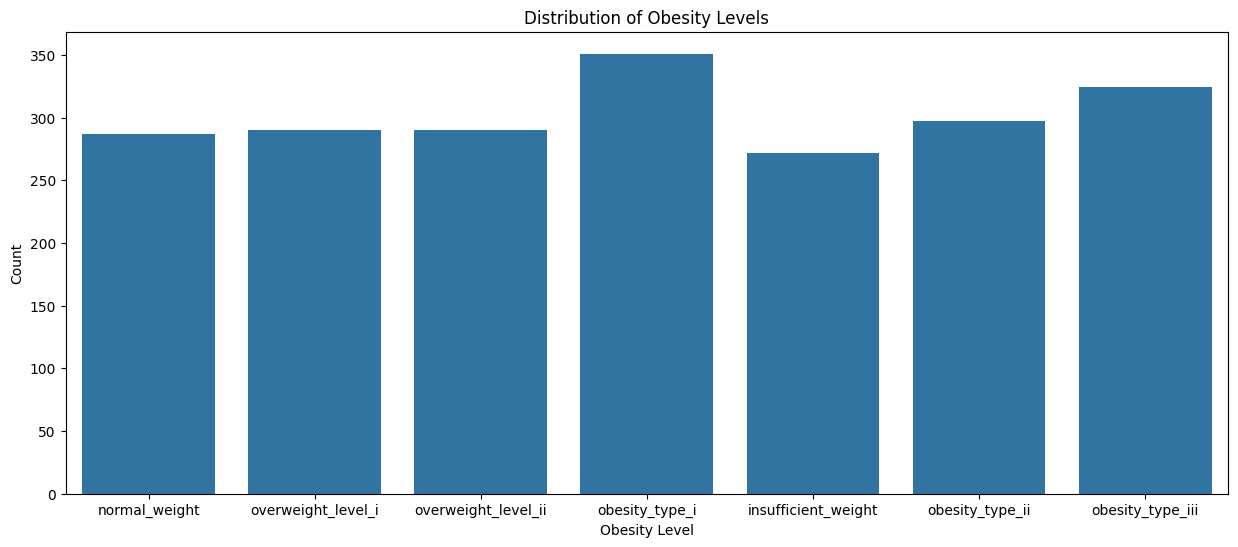

In [17]:
# Visualisasi distribusi target
plt.figure(figsize=(15, 6))
sns.countplot(data=obesity_data, x='NObeyesdad')
plt.title('Distribution of Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.show()

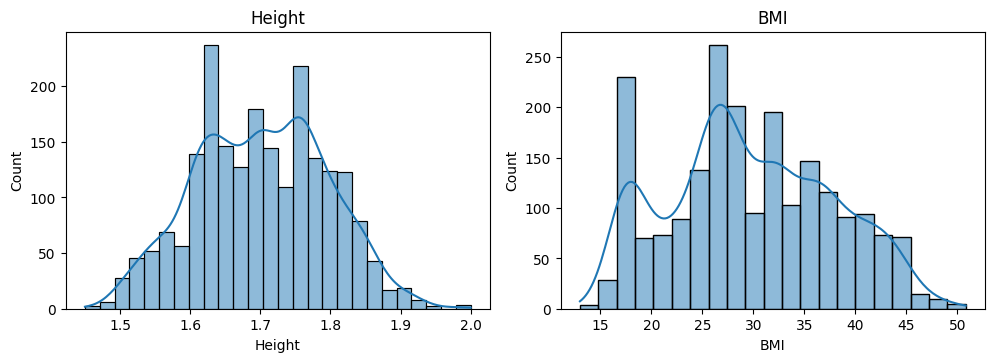

In [18]:
# Visualisasi distribusi fitur numerik
numeric_features = obesity_data.select_dtypes(include=['float64'])
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=obesity_data, x=col, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

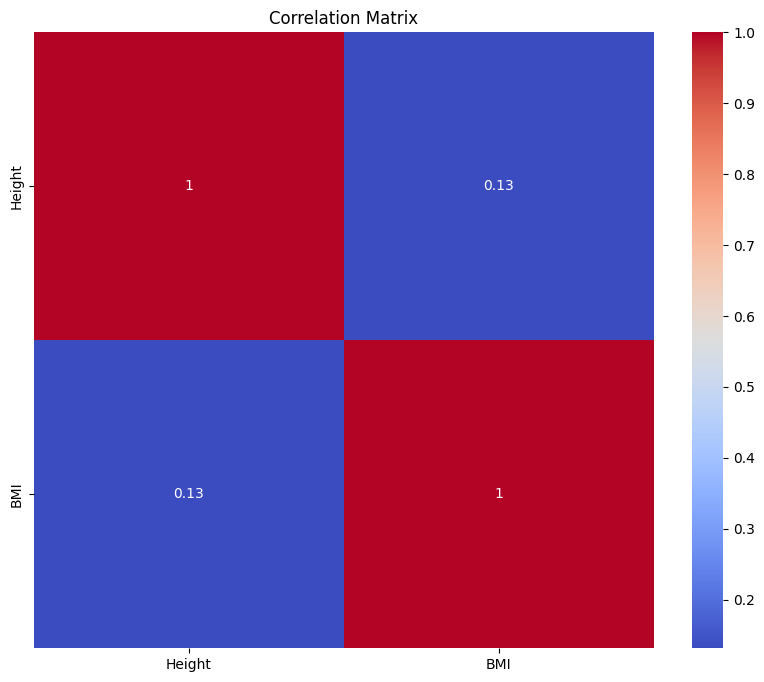

In [19]:
# Menghilangkan kolom kategorikal sebelum menghitung korelasi
numeric_features = obesity_data.select_dtypes(include=['float64'])

# Korelasi antar fitur numerik
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **Preprocessing**

In [20]:
obesity_data.replace("yes",1,inplace=True)
obesity_data.replace("no",0,inplace=True)

#target=obesity_data["NObeyesdad"]
#obesity_data.drop(["NObeyesdad"], axis=1, inplace=True)
obesity_data.drop(["id"], axis=1, inplace=True)

/var/folders/4s/bfs93j3x2rl1nkns6mld6m_w0000gn/T/ipykernel_2561/798984181.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  obesity_data.replace("no",0,inplace=True)


In [21]:
obesity_data.Gender.unique()
obesity_data.replace("female",0,inplace=True)
obesity_data.replace("male",1,inplace=True)

/var/folders/4s/bfs93j3x2rl1nkns6mld6m_w0000gn/T/ipykernel_2561/2139918140.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  obesity_data.replace("male",1,inplace=True)


In [22]:
obesity_data.FCVC.unique()
obesity_data.replace("never",2,inplace=True)
obesity_data.replace("sometimes",3,inplace=True)
obesity_data.replace("always",4,inplace=True)

/var/folders/4s/bfs93j3x2rl1nkns6mld6m_w0000gn/T/ipykernel_2561/1151749297.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  obesity_data.replace("always",4,inplace=True)


In [23]:
obesity_data.NCP.unique()
obesity_data.replace("1",0,inplace=True)
obesity_data.replace("2",1,inplace=True)
obesity_data.replace("3",2,inplace=True)
obesity_data.replace("4",3,inplace=True)

In [24]:
obesity_data.CAEC.unique()
obesity_data.replace("frequently",5,inplace=True)

/var/folders/4s/bfs93j3x2rl1nkns6mld6m_w0000gn/T/ipykernel_2561/3497247678.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  obesity_data.replace("frequently",5,inplace=True)


In [25]:
obesity_data.CH2O.unique()
obesity_data.replace("between 1 and 2 l",0,inplace=True)
obesity_data.replace("less than a liter",1,inplace=True)
obesity_data.replace("more than 2 l",2,inplace=True)

/var/folders/4s/bfs93j3x2rl1nkns6mld6m_w0000gn/T/ipykernel_2561/3131903672.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  obesity_data.replace("more than 2 l",2,inplace=True)


In [26]:
obesity_data.FAF.unique()
obesity_data.replace("0",0,inplace=True)
obesity_data.replace("1 to 2",1,inplace=True)
obesity_data.replace("2 to 4",2,inplace=True)
obesity_data.replace("4 to 5",3,inplace=True)

/var/folders/4s/bfs93j3x2rl1nkns6mld6m_w0000gn/T/ipykernel_2561/1019827759.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  obesity_data.replace("4 to 5",3,inplace=True)


In [27]:
obesity_data.TUE.unique()
obesity_data.replace("0 to 2",0,inplace=True)
obesity_data.replace("3 to 5",1,inplace=True)
obesity_data.replace(">5",2,inplace=True)

/var/folders/4s/bfs93j3x2rl1nkns6mld6m_w0000gn/T/ipykernel_2561/304662073.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  obesity_data.replace(">5",2,inplace=True)


In [28]:
obesity_data.MTRANS.unique()
obesity_data.replace("walking",0,inplace=True)
obesity_data.replace("bike",1,inplace=True)
obesity_data.replace("motorbike",2,inplace=True)
obesity_data.replace("automobile",3,inplace=True)
obesity_data.replace("public_transportation",4,inplace=True)

/var/folders/4s/bfs93j3x2rl1nkns6mld6m_w0000gn/T/ipykernel_2561/3541653203.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  obesity_data.replace("public_transportation",4,inplace=True)


In [29]:
obesity_data.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
2106,0,21,1.71,131,1,1,4,3,3,0,0,0,2,1,3,4,obesity_type_iii,44.901475
2107,0,22,1.75,134,1,1,4,3,3,0,0,0,1,1,3,4,obesity_type_iii,43.741923
2108,0,23,1.75,134,1,1,4,3,3,0,0,0,1,1,3,4,obesity_type_iii,43.543817
2109,0,24,1.74,133,1,1,4,3,3,0,2,0,1,1,3,4,obesity_type_iii,44.071535
2110,0,24,1.74,133,1,1,4,3,3,0,2,0,1,1,3,4,obesity_type_iii,44.144338


In [30]:
# Split the data into training and testing
features = ["Gender", "Age", "Height", "Weight", "family_history_with_overweight", "FAVC", "FCVC", "NCP", "CAEC", "SMOKE", "CH2O", "SCC", "FAF", "TUE", "CALC", "MTRANS", "BMI"]
#x = pd.get_dummies(obesity_data[features])
x = obesity_data[features]
#x = ["Gender", "Age", "Height", "Weight", "family_history_with_overweight", "FAVC", "FCVC", "NCP", "CAEC", "SMOKE", "CH2O", "SCC", "FAF", "TUE", "CALC", "MTRANS", "BMI"]
y = obesity_data["NObeyesdad"]

In [31]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the logistic regression classifier
model = LogisticRegression(max_iter=1000)

# Train the classifier
model.fit(x_train, y_train)

# Predict labels for the test set
y_test_pred = model.predict(x_test)

# True labels for the test set
true_labels = y_test

print("True labels:", true_labels)
print("Predicted labels:", y_test_pred)

True labels: 544     insufficient_weight
1987       obesity_type_iii
420     insufficient_weight
527     insufficient_weight
196           normal_weight
               ...         
447      overweight_level_i
1793        obesity_type_ii
73            normal_weight
1711        obesity_type_ii
1103    overweight_level_ii
Name: NObeyesdad, Length: 423, dtype: object
Predicted labels: ['insufficient_weight' 'obesity_type_iii' 'insufficient_weight'
 'insufficient_weight' 'overweight_level_ii' 'insufficient_weight'
 'obesity_type_ii' 'overweight_level_i' 'obesity_type_i'
 'insufficient_weight' 'obesity_type_i' 'obesity_type_iii'
 'obesity_type_ii' 'obesity_type_ii' 'obesity_type_iii'
 'overweight_level_ii' 'obesity_type_iii' 'obesity_type_ii'
 'obesity_type_i' 'overweight_level_ii' 'obesity_type_i'
 'overweight_level_i' 'obesity_type_iii' 'obesity_type_ii' 'normal_weight'
 'overweight_level_ii' 'overweight_level_ii' 'obesity_type_iii'
 'obesity_type_iii' 'insufficient_weight' 'obesity_type_i

/Users/keyla/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
x.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'BMI'],
      dtype='object')

In [33]:
y

0             normal_weight
1             normal_weight
2             normal_weight
3        overweight_level_i
4       overweight_level_ii
               ...         
2106       obesity_type_iii
2107       obesity_type_iii
2108       obesity_type_iii
2109       obesity_type_iii
2110       obesity_type_iii
Name: NObeyesdad, Length: 2111, dtype: object

In [34]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate accuracy
accuracy = np.trace(cm) / float(np.sum(cm))
print("Accuracy:", accuracy)

Confusion Matrix:
[[54  2  0  0  0  0  0]
 [ 4 44  0  0  0 12  2]
 [ 0  0 61  9  3  0  5]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  4  1  0  0 42  9]
 [ 0  0  2  0  0  6 42]]
Accuracy: 0.8581560283687943


In [47]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the model
accuracy = accuracy_score(true_labels, y_test_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(true_labels, y_test_pred))

#rmse

#mae

Accuracy: 0.8581560283687943

Classification Report:
                     precision    recall  f1-score   support

insufficient_weight       0.93      0.96      0.95        56
      normal_weight       0.88      0.71      0.79        62
     obesity_type_i       0.94      0.78      0.85        78
    obesity_type_ii       0.86      0.98      0.92        58
   obesity_type_iii       0.95      1.00      0.98        63
 overweight_level_i       0.70      0.75      0.72        56
overweight_level_ii       0.72      0.84      0.78        50

           accuracy                           0.86       423
          macro avg       0.86      0.86      0.85       423
       weighted avg       0.86      0.86      0.86       423



1. Explore Features

In [36]:
def count_values(dataset, cat_variable, order = None):
    """
    Function: Counts values in each category and displays them on a plot.

    Parameters: Dataset, category feature, and order of appearance (order is optional).
    """
    ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)
    for p in ax.patches:
        ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()),
                    ha = "center", va = "top", color = "white", size = 10)

    plt.title(f"Number of items in each {cat_variable} category")
    plt.show()

Gender

/var/folders/4s/bfs93j3x2rl1nkns6mld6m_w0000gn/T/ipykernel_2561/3386655578.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)


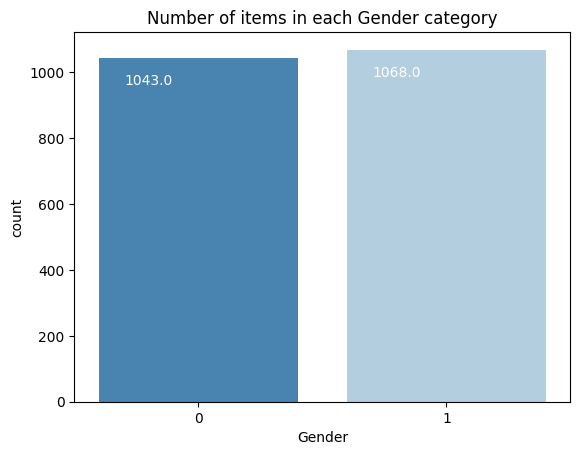

In [37]:
count_values(obesity_data, "Gender")

Age

In [38]:
def plot_distribution(dataset, feature):
    """
    Function: Computes and displays distribution of features with continuous values; plots their mean and median.

    Parameters: Dataset and feature with continuous values.
    """
    plt.hist(dataset[feature], bins = "fd")

    plt.axvline(dataset[feature].mean(), color = "red", label = "mean")
    plt.axvline(dataset[feature].median(), color = "orange", label = "median")

    plt.xlabel(f"{feature}")
    plt.ylabel("Count")
    plt.legend()
    plt.title(f"Distribution of values in {feature}")
    plt.show()

In [39]:
obesity_data["Age"].describe()

count    2111.000000
mean       24.315964
std         6.357078
min        14.000000
25%        20.000000
50%        23.000000
75%        26.000000
max        61.000000
Name: Age, dtype: float64

In [40]:
obesity_data["Age"].median()

23.0

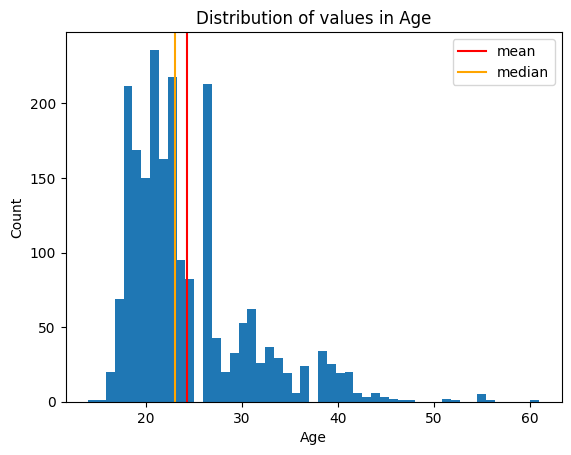

In [41]:
plot_distribution(obesity_data, "Age")

In [42]:
import pickle

# Assuming you have already trained your logistic regression model and stored it in a variable named 'model'

# Save the model to a file
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Later, you can load the model from the file
with open('logistic_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
